# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ

–ë—É–¥–µ–º –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ –≤ –≥–æ—Ä–æ–¥–µ –ë–∞–Ω–≥–∞–ª–æ—Ä (–ò–Ω–¥–∏—è)

## –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# –¥–∞–Ω–Ω—ã–µ –ø–æ –ø—Ä–æ–¥–∞–∂–∞–º –≤ –ò–Ω–¥–∏–∏ –≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ —à—Ç–∞—Ç–∞—Ö
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [ ]:
df.date = pd.DatetimeIndex(df.date)

# –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –∏ –¥–æ–±–∞–≤–∏–º date –≤ –∏–Ω–¥–µ–∫—Å
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [ ]:
df.head()

market     month  year  quantity  priceMin  priceMax  \
date                                                                   
1996-01  LASALGAON(MS)   January  1996    225063       160       257   
1996-02  LASALGAON(MS)  February  1996    196164       133       229   
1996-03  LASALGAON(MS)     March  1996    178992       155       274   
1996-04  LASALGAON(MS)     April  1996    192592       136       279   
1996-05  LASALGAON(MS)       May  1996    237574       154       312   

         priceMod state       city       date  
date                                           
1996-01       226    MS  LASALGAON 1996-01-01  
1996-02       186    MS  LASALGAON 1996-02-01  
1996-03       243    MS  LASALGAON 1996-03-01  
1996-04       254    MS  LASALGAON 1996-04-01  
1996-05       269    MS  LASALGAON 1996-05-01

–û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –¥–∞–Ω–Ω—ã–µ –ø–æ –≥–æ—Ä–æ–¥—É –ë–∞–Ω–≥–∞–ª–æ—Ä

In [ ]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [ ]:
# –£–¥–∞–ª–∏–º –ª–∏—à–Ω–∏–µ —Å—Ç–æ–ª–±—Ü—ã
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [ ]:
ts.head()

quantity
date             
2004-01    227832
2004-02    225133
2004-03    221952
2004-04    185150
2004-05    137390

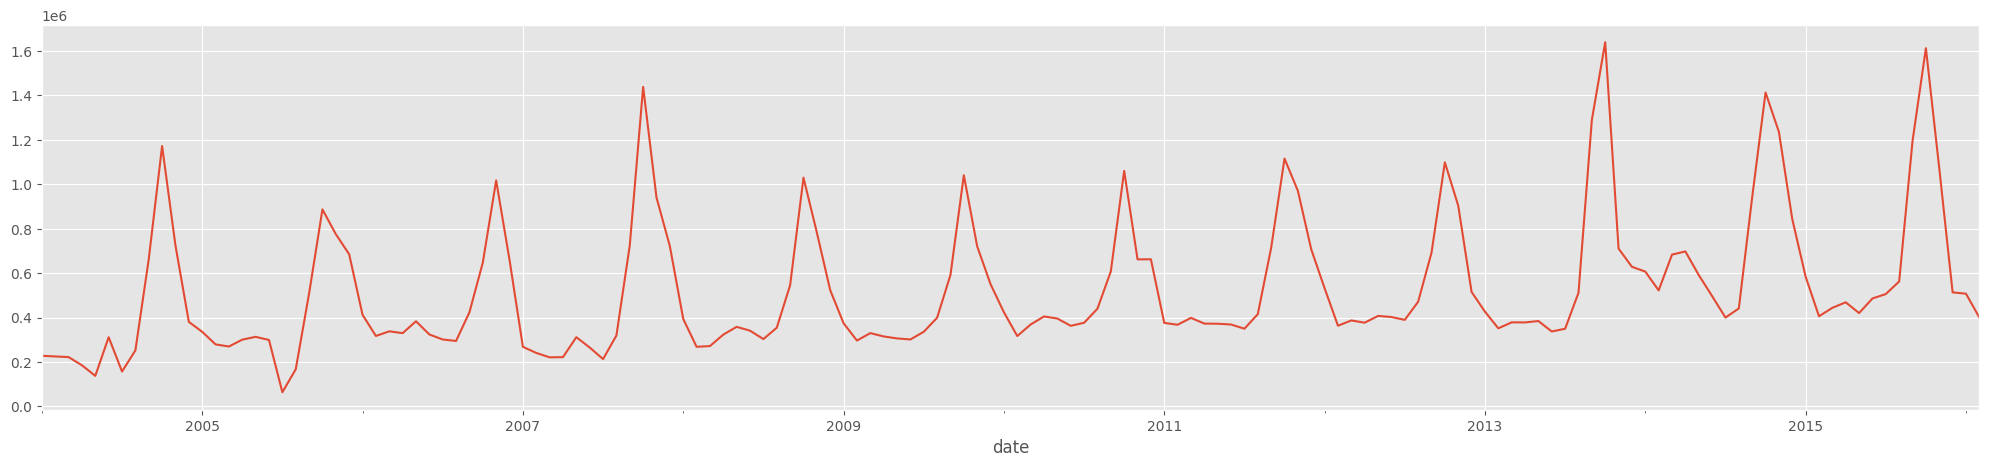

In [ ]:
ts.quantity.plot(figsize=(25,5));

## –û–±—É—á–µ–Ω–∏–µ –∞–¥–∞–ø—Ç–∏–≤–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π

–†–∞–∑–±–µ–π—Ç–µ –¥–∞–Ω–Ω—ã–µ (quantity) –Ω–∞ train –∏ test.

* train - –ø–µ—Ä–≤—ã–µ 85% –¥–∞–Ω–Ω—ã—Ö

* test - —Å–ª–µ–¥—É—é—â–∏–µ 15% –¥–∞–Ω–Ω—ã—Ö

–ü—Ä–æ–≤–µ—Ä—å—Ç–µ, —á—Ç–æ –≤ —Ç–µ—Å—Ç –ø–æ–ø–∞–ª–æ 22 –∏–∑–º–µ—Ä–µ–Ω–∏—è.

In [ ]:
# –≤–∞—à –∫–æ–¥ –∑–¥–µ—Å—å
iindex = int(ts.shape[0] * 0.85)

train = ts.iloc[:iindex]
test = ts.iloc[iindex:]
print(test.shape[0] == 22)

True


–û–±—É—á–∏—Ç–µ —Å–ª–µ–¥—É—é—â–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–¥–µ–ª–∞–π—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 22 —à–∞–≥–∞ –≤–ø–µ—Ä–µ–¥ (–≤–µ–ª–∏—á–∏–Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö), –Ω–∞—Ä–∏—Å—É–π—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑—ã:

1) –ü—Ä–æ—Å—Ç–æ–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø–æ–¥–±–∏—Ä–∞–µ–º—ã–º $\alpha$

2) –ú–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞ (–∞–¥–¥–∏—Ç–∏–≤–Ω—É—é) —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

3) –ê–¥–¥–∏—Ç–∏–≤–Ω—É—é –º–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞ —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∑–∞—Ç—É—Ö–∞—é—â–∏–º —Ç—Ä–µ–Ω–¥–æ–º

In [ ]:
# –≤–∞—à –∫–æ–¥ –∑–¥–µ—Å—å

# –ü—Ä–æ—Å—Ç–æ–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø–æ–¥–±–∏—Ä–∞–µ–º—ã–º  ùõº

simple_fit = SimpleExpSmoothing(train, initialization_method='heuristic').fit()
simple_forecast = simple_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


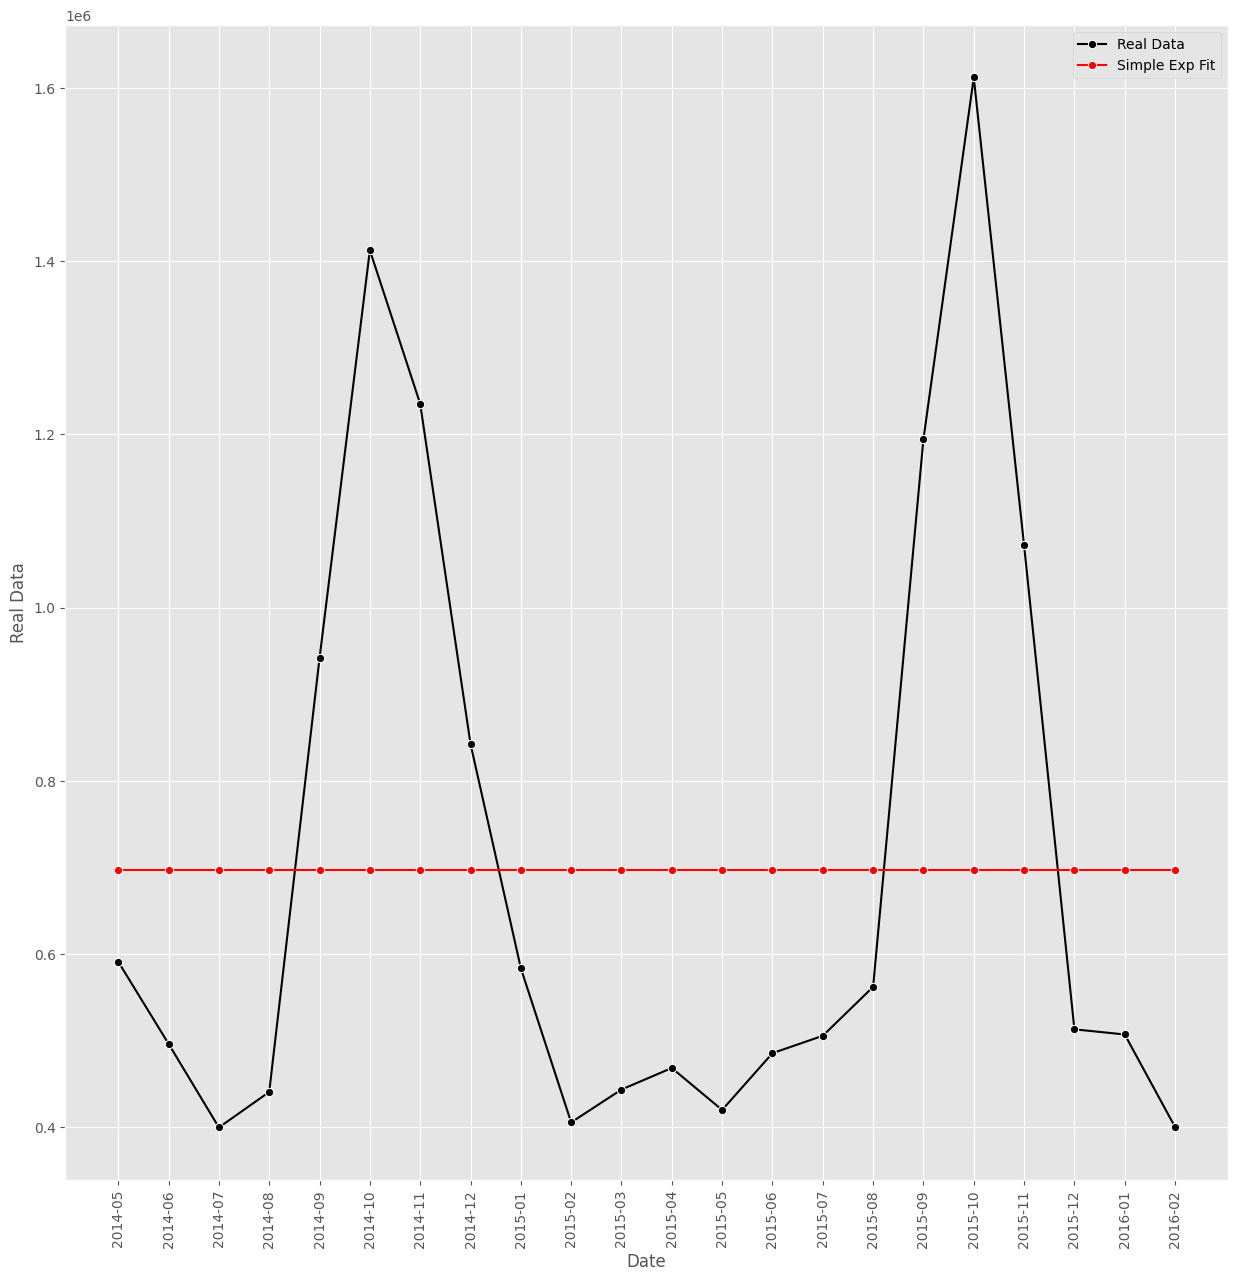

In [ ]:
data = pd.DataFrame({'Date': test['quantity'].index.astype(str), 'Real Data': test['quantity'], 'Simple Exp Fit': simple_forecast.values})
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='Simple Exp Fit', data=data, marker='o', color='red', label='Simple Exp Fit')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# –ú–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞ (–∞–¥–¥–∏—Ç–∏–≤–Ω–∞—è) —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

holt_fit = Holt(train, initialization_method='estimated').fit()
holt_forecast = holt_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


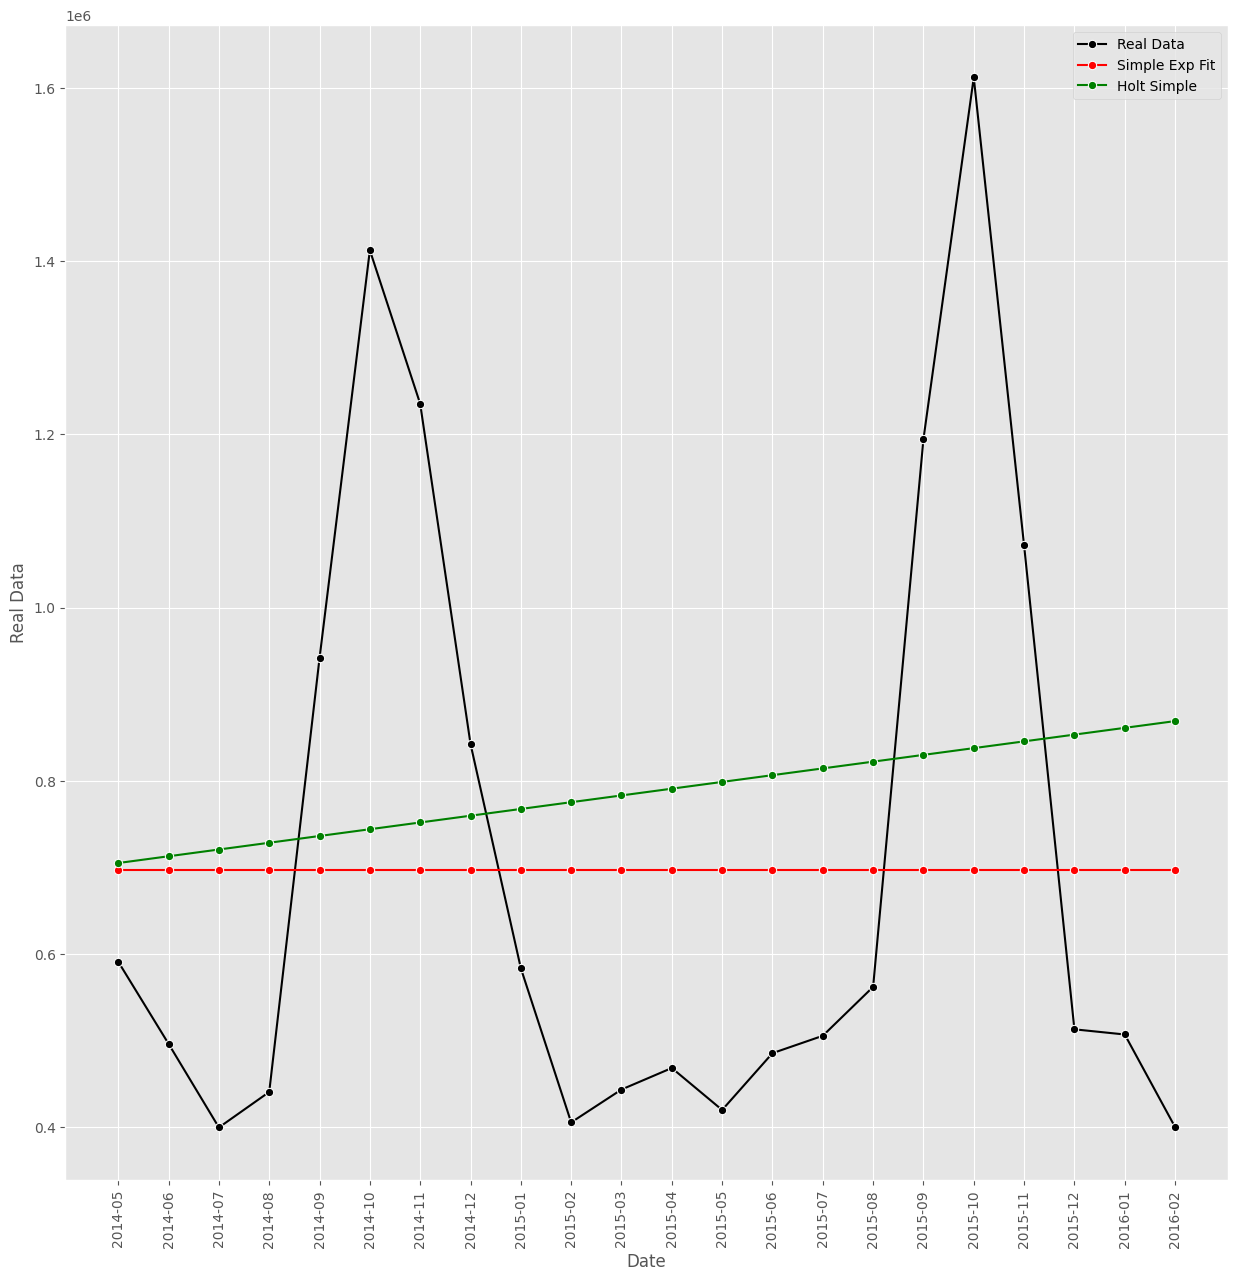

In [ ]:
data = pd.DataFrame({'Date': test['quantity'].index.astype(str), 'Real Data': test['quantity'], 'Simple Exp Fit': simple_forecast.values, 'Holt Simple': holt_forecast.values})
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='Simple Exp Fit', data=data, marker='o', color='red', label='Simple Exp Fit')
sns.lineplot(x='Date', y='Holt Simple', data=data, marker='o', color='green', label='Holt Simple')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# –ê–¥–¥–∏—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞ —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∑–∞—Ç—É—Ö–∞—é—â–∏–º —Ç—Ä–µ–Ω–¥–æ–º
holt_dl_fit = Holt(train, damped_trend=True, initialization_method='estimated').fit()
holt_dl_forecast = holt_dl_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


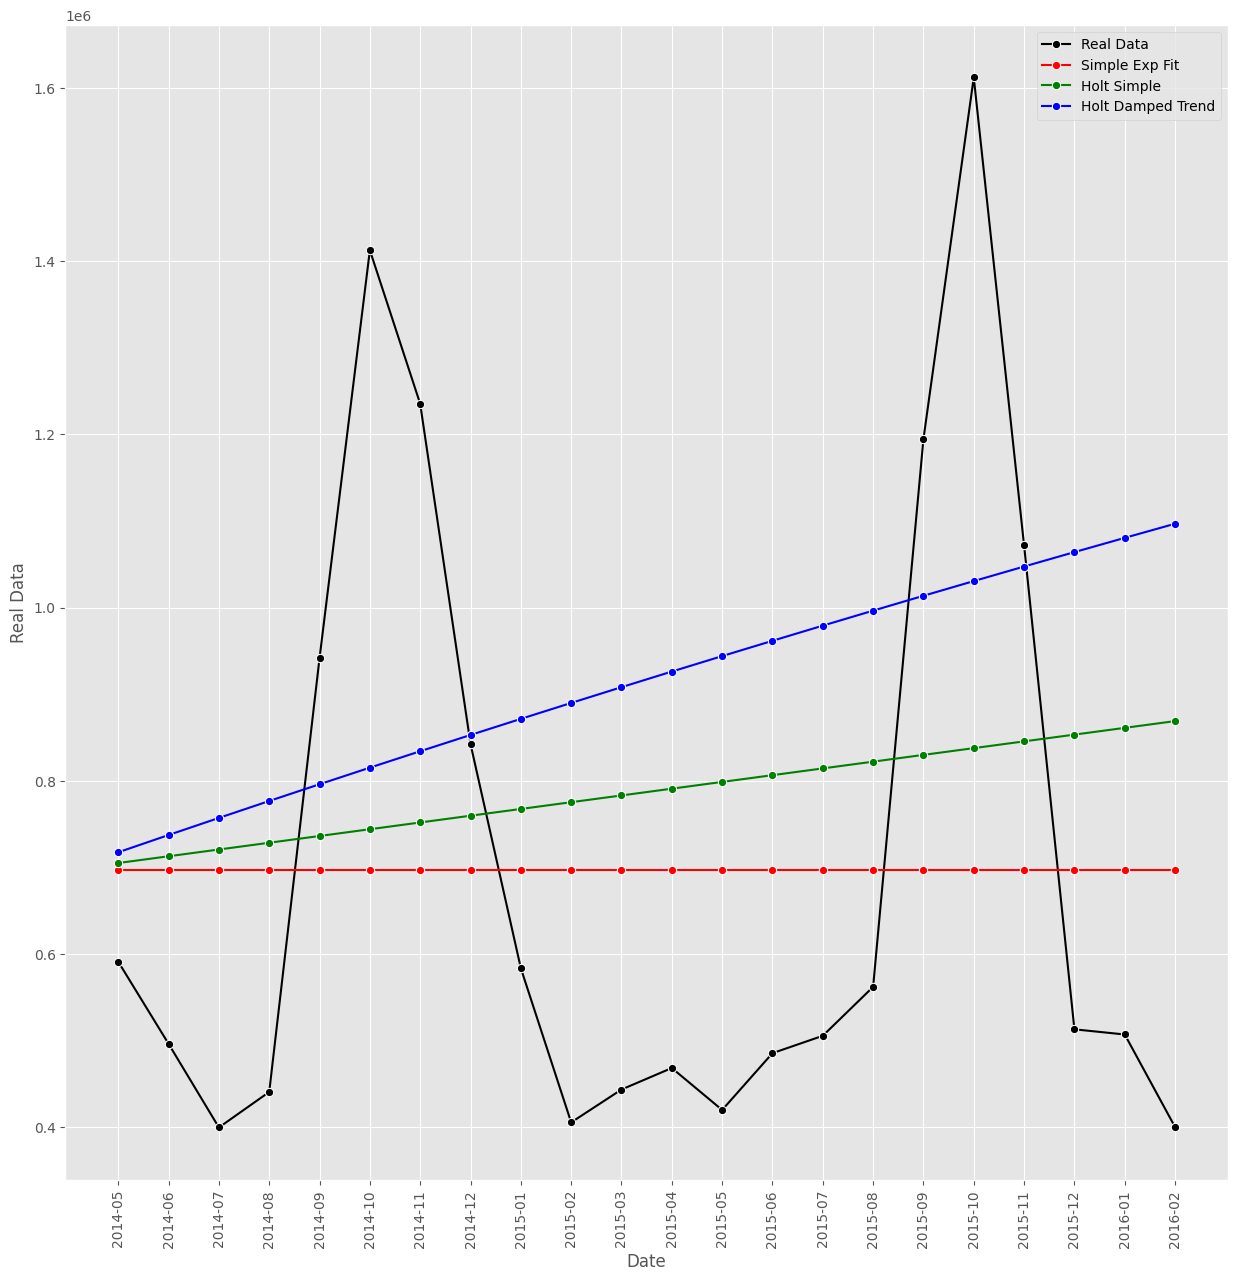

In [ ]:
data = pd.DataFrame({'Date': test['quantity'].index.astype(str),
                     'Real Data': test['quantity'],
                     'Simple Exp Fit': simple_forecast.values,
                     'Holt Simple': holt_forecast.values,
                     'Holt Damped Trend': holt_dl_forecast.values})
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='Simple Exp Fit', data=data, marker='o', color='red', label='Simple Exp Fit')
sns.lineplot(x='Date', y='Holt Simple', data=data, marker='o', color='green', label='Holt Simple')
sns.lineplot(x='Date', y='Holt Damped Trend', data=data, marker='o', color='blue', label='Holt Damped Trend')
plt.xticks(rotation=90)
plt.show()


In [ ]:
print('r2 for simple = %.4f' % r2_score(test['quantity'], simple_forecast.values))
print('r2 for holt = %.4f' % r2_score(test['quantity'], holt_forecast.values))
print('r2 for holt with dl = %.4f' % r2_score(test['quantity'], holt_dl_forecast.values))

r2 for simple = -0.0006
r2 for holt = -0.0554
r2 for holt with dl = -0.3983


## Quiz

–£ –∫–∞–∫–æ–π –∏–∑ —Ç—Ä–µ—Ö –æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π —Å–∞–º—ã–π –±—ã—Å—Ç—Ä–æ –≤–æ–∑—Ä–∞—Å—Ç–∞—é—â–∏–π —Ç—Ä–µ–Ω–¥?

–û–±—É—á–∏—Ç–µ —á–µ—Ç—ã—Ä–µ –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–í–∏–Ω—Ç–µ—Ä—Å–∞ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–¥–µ–ª–∞–π—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 22 —à–∞–≥–∞ –≤–ø–µ—Ä–µ–¥ (–≤–µ–ª–∏—á–∏–Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö), –Ω–∞—Ä–∏—Å—É–π—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑—ã:

1) –ú–æ–¥–µ–ª—å —Å –∞–¥–¥–∏—Ç–∏–≤–Ω—ã–º–∏ —Ç—Ä–µ–Ω–¥–æ–º –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é

2) –ú–æ–¥–µ–ª—å —Å –∞–¥–¥–∏—Ç–∏–≤–Ω—ã–º —Ç—Ä–µ–Ω–¥–æ–º –∏ –º—É–ª—å—Ç–∏–ø–ª–∏–∫–∞—Ç–∏–≤–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é

3) –ú–æ–¥–µ–ª—å —Å –∞–¥–¥–∏—Ç–∏–≤–Ω—ã–º–∏ —Ç—Ä–µ–Ω–¥–æ–º –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é –∏ –∑–∞—Ç—É—Ö–∞—é—â–∏–º —Ç—Ä–µ–Ω–¥–æ–º

4) –ú–æ–¥–µ–ª—å —Å –∞–¥–¥–∏—Ç–∏–≤–Ω—ã–º —Ç—Ä–µ–Ω–¥–æ–º –∏ –º—É–ª—å—Ç–∏–ø–ª–∏–∫–∞—Ç–∏–≤–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é –∏ –∑–∞—Ç—É—Ö–∞—é—â–∏–º —Ç—Ä–µ–Ω–¥–æ–º

In [ ]:
# –≤–∞—à –∫–æ–¥ –∑–¥–µ—Å—å
fit1 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit1_forecast = fit1.forecast(len(test))

In [ ]:
fit2 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='mul',
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit2_forecast = fit2.forecast(len(test))

In [ ]:
fit3 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    damped_trend=True,
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit3_forecast = fit3.forecast(len(test))

In [ ]:
fit4 = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='mul',
    damped_trend=True,
    initialization_method='estimated',
    use_boxcox=True
).fit()
fit4_forecast = fit4.forecast(len(test))

In [ ]:
fit1_forecast = fit1.forecast(len(test))
fit2_forecast = fit2.forecast(len(test))
fit3_forecast = fit3.forecast(len(test))
fit4_forecast = fit4.forecast(len(test))

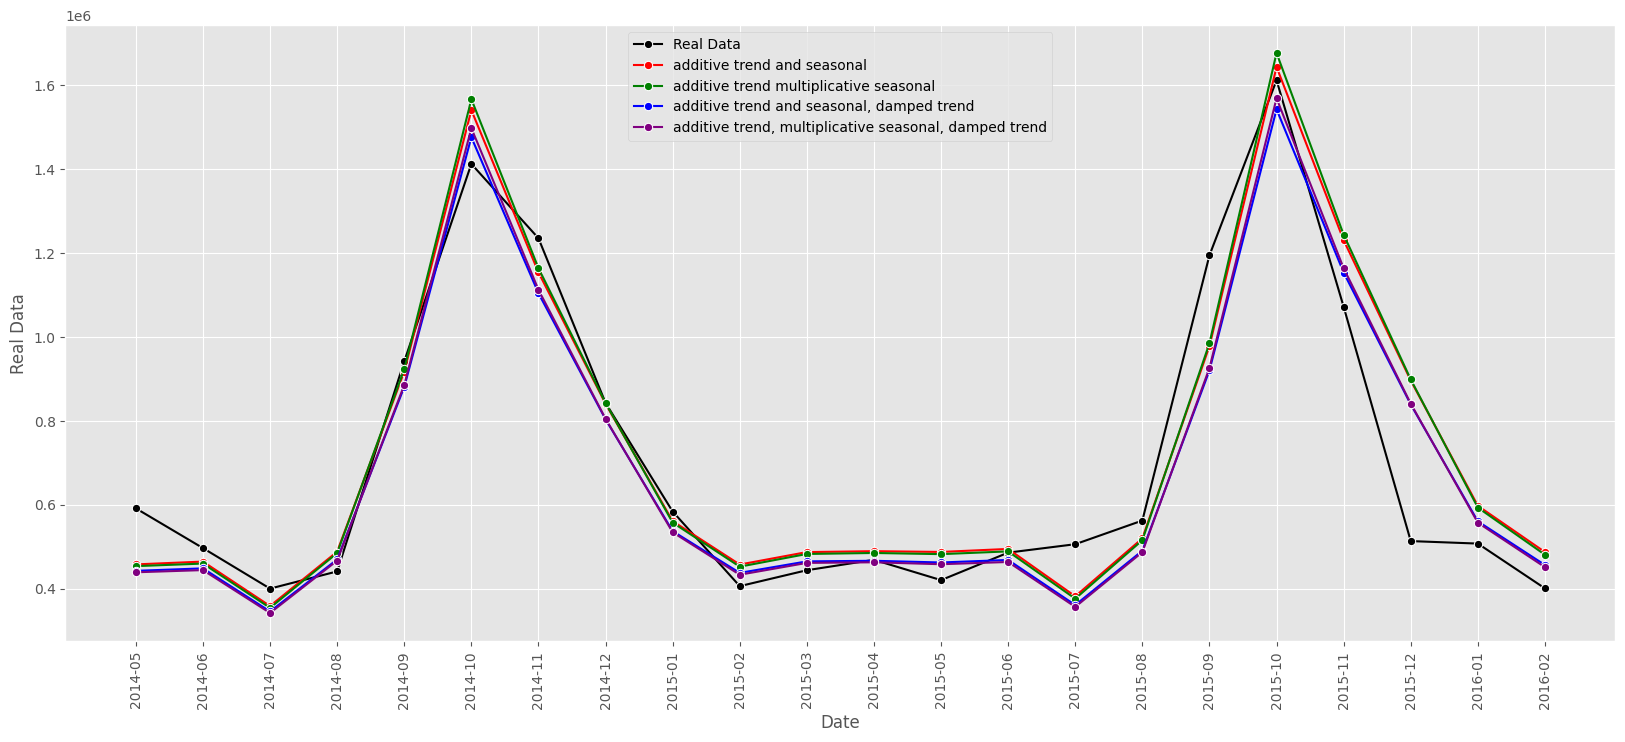

In [ ]:
data = pd.DataFrame({'Date': test.index.astype(str),
                     'Real Data': test['quantity'],
                     'additive trend and seasonal': fit1_forecast.values,
                     'additive trend multiplicative seasonal': fit2_forecast.values,
                     'additive trend and seasonal, damped trend': fit3_forecast.values,
                     'additive trend, multiplicative seasonal, damped trend': fit4_forecast.values})

plt.figure(figsize=(20, 8))
sns.lineplot(x='Date', y='Real Data', data=data, marker='o', color='black', label='Real Data')
sns.lineplot(x='Date', y='additive trend and seasonal', data=data, marker='o', color='red', label='additive trend and seasonal')
sns.lineplot(x='Date', y='additive trend multiplicative seasonal', data=data, marker='o', color='green', label='additive trend multiplicative seasonal')
sns.lineplot(x='Date', y='additive trend and seasonal, damped trend', data=data, marker='o', color='blue', label='additive trend and seasonal, damped trend')
sns.lineplot(x='Date', y='additive trend, multiplicative seasonal, damped trend', data=data, marker='o', color='purple', label='additive trend, multiplicative seasonal, damped trend')
plt.xticks(rotation=90)
plt.show()

–í—ã—á–∏—Å–ª–∏—Ç–µ RMSE (–∫–æ—Ä–µ–Ω—å –∏–∑ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏) –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —á–µ—Ç—ã—Ä–µ—Ö –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.

In [ ]:
from sklearn.metrics import mean_squared_error

# –≤–∞—à –∫–æ–¥ –∑–¥–µ—Å—å

## Quiz

–ö–∞–∫–∞—è –º–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å –ª—É—á—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö?

## Quiz

–ß–µ–º—É —Ä–∞–≤–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ RMSE –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏? –û—Ç–≤–µ—Ç –æ–∫—Ä—É–≥–ª–∏—Ç–µ –¥–æ —Ü–µ–ª–æ–≥–æ —á–∏—Å–ª–∞.

–í –ø—Ä–µ–¥—ã–¥—É—â–µ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –º—ã —Ä–∞–±–æ—Ç–∞–ª–∏ —Å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Ä—è–¥–æ–º –∏ –≤—ã—á–∏—Å–ª—è–ª–∏ RMSE –¥–ª—è –Ω–µ–≥–æ.

–í—ã—á–∏—Å–ª–∏—Ç–µ –æ—à–∏–±–∫–∏ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —á–µ—Ç—ã—Ä–µ—Ö –º–æ–¥–µ–ª–µ–π –¥–ª—è –ª–æ–≥–∞—Ä–∏—Ñ–º–æ–≤ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –∏ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.

In [ ]:
# –≤–∞—à –∫–æ–¥ –∑–¥–µ—Å—å

## Quiz

–ö–∞–∫–æ–µ —Å–µ–º–µ–π—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –ª—É—á—à–µ —Å–ø—Ä–∞–≤–∏–ª–æ—Å—å —Å —Ä–µ—à–µ–Ω–∏–µ–º –∑–∞–¥–∞—á–∏:
SARIMAX –∏–ª–∏ –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–í–∏–Ω—Ç–µ—Ä—Å–∞?

## –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–µ –∑–∞–¥–∞–Ω–∏–µ (–±–µ–∑ –ø—Ä–æ–≤–µ—Ä–∫–∏)

–í–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Orbit –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –≤ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ.

In [ ]:
# –≤–∞—à –∫–æ–¥ –∑–¥–µ—Å—å